## <center>**–ü—ñ–¥–∫–ª—é—á–µ–Ω–Ω—è –±—ñ–±–ª—ñ–æ—Ç–µ–∫**</center>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# –ë—ñ–±–ª—ñ–æ—Ç–µ–∫–∏ –¥–ª—è –º–∞—à–∏–Ω–Ω–æ–≥–æ –Ω–∞–≤—á–∞–Ω–Ω—è
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# –ú–æ–¥–µ–ª—ñ —Ä–µ–≥—Ä–µ—Å—ñ—ó
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

# –ú–æ–¥–µ–ª—ñ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# –ú–æ–¥–µ–ª—ñ –¥–ª—è –∞–Ω—Å–∞–º–±–ª—é
from sklearn.ensemble import StackingRegressor


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# –í—Å—Ç–∞–Ω–æ–≤–ª—é —Å—Ç–∏–ª—å –≥—Ä–∞—Ñ—ñ–∫—ñ–≤
sns.set_theme(style='whitegrid', context='notebook')

---

## <Center> **–ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö —Ç–∞ –æ–±—Ä–æ–±–∫–∞ –¥–∞–Ω–∏—Ö** </Center> 

#### **–ß–∏—Ç–∞–Ω–Ω—è –§–∞–π–ª—É**

In [6]:
print(os.path.exists("calories.csv"))

True


In [7]:
ds = pd.read_csv("calories.csv")

print("–†–æ–∑–º—ñ—Ä –¥–∞–Ω–∏—Ö:", ds.shape)
display(ds.head())

–†–æ–∑–º—ñ—Ä –¥–∞–Ω–∏—Ö: (15000, 9)


User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [8]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  9 

columns:  ['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


### **–ê–Ω–∞–ª—ñ–∑ –¥–∞–Ω–∏—Ö**

<center><p><b>–ü—Ä–æ–ø—É—â–µ–Ω—ñ —á–∏ –≤—ñ–¥—Å—É—Ç–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è</p></center>

In [9]:
print("–ß–∏ —î –±—É–¥—å-—è–∫—ñ –≤—ñ–¥—Å—É—Ç–Ω—ñ –¥–∞–Ω—ñ:",ds.isnull().values.any())

–ß–∏ —î –±—É–¥—å-—è–∫—ñ –≤—ñ–¥—Å—É—Ç–Ω—ñ –¥–∞–Ω—ñ: False


<center><p><b>–£–Ω—ñ–∫–∞–ª—å–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è</p></center>

In [10]:
ds.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

<center><p><b>–¢–∏–ø–∏ –¥–∞–Ω–∏—Ö –∫–æ–∂–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–Ω—è</p></center>

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<center><p><b>–ú–∞—Å—à—Ç–∞–± –∑–Ω–∞—á–µ–Ω—å –æ–∑–Ω–∞–∫</p></center>

In [12]:
ds.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

<mark><b>–£–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Ç–∞ –∞–Ω–æ–º–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö –Ω–µ –∑–Ω–∞–π–¥–µ–Ω–æ!</mark>

### **–û—á–∏—â–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö**

<center><p><b>Null Data</p></center>

In [13]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(ds, ds[x].isnull().sum())
        missing.append(x)
    else:
        print (x + " dont have null data!")

User_ID dont have null data!
Gender dont have null data!
Age dont have null data!
Height dont have null data!
Weight dont have null data!
Duration dont have null data!
Heart_Rate dont have null data!
Body_Temp dont have null data!
Calories dont have null data!


<mark><b>–ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –¥–∞–Ω–∏—Ö –Ω–µ–º–∞—î!</mark>

In [14]:
ds.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

<center><p><b>–í–∏–¥–∞–ª–µ–Ω–Ω—è –∫–æ–ª–æ–Ω–∫–∏ User_ID</p></center>

In [15]:
# –≤–∏–¥–∞–ª—è—î–º–æ —Å—Ç–æ–≤–ø–µ—Ü—å User_ID —É –∑–≤'—è–∑–∫—É –∑ —Ç–∏–º, —â–æ –≤—ñ–Ω –Ω–µ –Ω–µ—Å–µ –∫–æ—Ä–∏—Å–Ω–æ—ó —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—ó
ds.drop(columns=["User_ID"], inplace=True)

<center><p><b>–∫–æ–ª–æ–Ω–∫–∞ - "Gender"  (One-Hot Encoding)</p></center>

In [16]:
ds = pd.get_dummies(ds, columns=["Gender"], drop_first=True)

In [17]:
ds.head()

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
0   68   190.0    94.0      29.0       105.0       40.8     231.0         True
1   20   166.0    60.0      14.0        94.0       40.3      66.0        False
2   69   179.0    79.0       5.0        88.0       38.7      26.0         True
3   34   179.0    71.0      13.0       100.0       40.5      71.0        False
4   27   154.0    58.0      10.0        81.0       39.8      35.0        False

In [18]:
ds["Gender_male"] = ds["Gender_male"].astype(int)

In [19]:
ds.head()

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
0   68   190.0    94.0      29.0       105.0       40.8     231.0            1
1   20   166.0    60.0      14.0        94.0       40.3      66.0            0
2   69   179.0    79.0       5.0        88.0       38.7      26.0            1
3   34   179.0    71.0      13.0       100.0       40.5      71.0            0
4   27   154.0    58.0      10.0        81.0       39.8      35.0            0

<center><p><b>–ü–æ–¥—ñ–ª –¥–∞–Ω–∏—Ö –Ω–∞ –Ω–∞–≤—á–∞–ª—å–Ω—ñ —Ç–∞ —Ç–µ—Å—Ç–æ–≤—ñ</p>

In [20]:
X = ds.drop("Calories", axis=1)
Y= ds["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("–¢—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ –¥–∞–Ω—ñ:", X_train.shape[0])
print("–¢–µ—Å—Ç–æ–≤—ñ –¥–∞–Ω—ñ:", X_test.shape[0])

–¢—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ –¥–∞–Ω—ñ: 12000
–¢–µ—Å—Ç–æ–≤—ñ –¥–∞–Ω—ñ: 3000


<center><p><b>–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü—ñ—è</p>

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index) 

## <Center> **–†–æ–∑–≤‚Äô—è–∑–∞–Ω–Ω—è –∑–∞–¥–∞—á—ñ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ñ—ó** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>–õ—ñ–Ω—ñ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è</p> </center>

In [22]:
#–ú–æ–¥–µ–ª—å
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# –ú–µ—Ç—Ä–∏–∫–∏
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("–õ—ñ–Ω—ñ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è - MAE: {:.3f}, RMSE: {:.3f}, R¬≤: {:.3f}".format(mae_lr, rmse_lr, r2_lr))

# –î–ª—è –æ—Ç—Ä–∏–º–∞–Ω–Ω—è –¥–æ–≤—ñ—Ä—á–∏—Ö —ñ–Ω—Ç–µ—Ä–≤–∞–ª—ñ–≤ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—î–º–æ OLS –∑ statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_sm).fit()
predictions_sm = ols_model.get_prediction(X_test_sm)
pred_summary = predictions_sm.summary_frame(alpha=0.05)  # 95% —ñ–Ω—Ç–µ—Ä–≤–∞–ª
display(pred_summary.head())


# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –ø—Ä–æ–≥–Ω–æ–∑—ñ–≤ –ª—ñ–Ω—ñ–π–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ñ—ó –∑ –¥–æ–≤—ñ—Ä—á–∏–º–∏ —ñ–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏ –¥–ª—è –ø–µ—Ä—à–∏—Ö 50 –∑—Ä–∞–∑–∫—ñ–≤
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], 'bo-', label='–§–∞–∫—Ç–∏—á–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.plot(y_pred_lr[:50], 'ro-', label='–ü—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.fill_between(np.arange(50), 
                 pred_summary['obs_ci_lower'][:50], 
                 pred_summary['obs_ci_upper'][:50], 
                 color='gray', alpha=0.2, label='95% –î–æ–≤—ñ—Ä—á–∏–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª')
plt.legend()
plt.xlabel('–Ü–Ω–¥–µ–∫—Å –∑—Ä–∞–∑–∫–∞')
plt.ylabel('–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞')
plt.title('–ü—Ä–æ–≥–Ω–æ–∑–∏ –ª—ñ–Ω—ñ–π–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ñ—ó –∑ –¥–æ–≤—ñ—Ä—á–∏–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.show()

–õ—ñ–Ω—ñ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è - MAE: 8.442, RMSE: 11.489, R¬≤: 0.967


mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
11499  170.676460  0.254612     170.177380     171.175540    148.578268   
6475   192.088578  0.345566     191.411212     192.765944    169.985641   
13167   56.147964  0.252993      55.652057      56.643871     34.049844   
862    155.476415  0.254109     154.978320     155.974510    133.378245   
5970   212.450667  0.333738     211.796486     213.104848    190.348428   

       obs_ci_upper  
11499    192.774652  
6475     214.191515  
13167     78.246084  
862      177.574584  
5970     234.552905

#### <center> <p style = 'background-color:darkblue'><b>Ridge + Bootstrap</p> </center>

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  170.676314         170.170294         171.162387
1   189.0  192.088273         191.259955         192.872041
2    53.0   56.148122          55.699489          56.596559
3   161.0  155.476398         154.869438         156.105561
4   226.0  212.450645         211.543809         213.257323
Ridge Regression - MAE: 8.442, RMSE: 11.489, R¬≤: 0.967


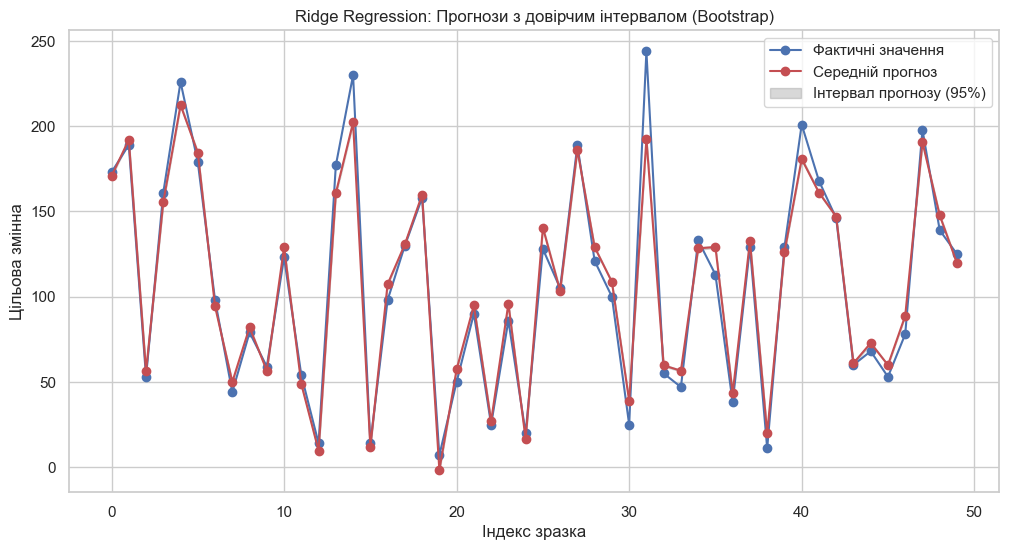

–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª: 129
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å: 3000
–ü–æ–∫—Ä–∏—Ç—Ç—è —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º: 4.300%


In [23]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample


alpha_search = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 0.05, 0.15, 100.0], cv=5)
alpha_search.fit(X_train_scaled, y_train)
best_alpha = alpha_search.alpha_

# Bootstrap –∑ —Ñ—ñ–∫—Å–æ–≤–∞–Ω–∏–º alpha
n_iterations = 1500
predictions = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train_scaled, y_train, random_state=i)
    rr_boot = Ridge(alpha=best_alpha)
    rr_boot.fit(X_resampled, y_resampled)
    y_pred_i = rr_boot.predict(X_test_scaled)
    predictions.append(y_pred_i)

predictions = np.array(predictions)

# –ö–≤–∞–Ω—Ç–∏–ª—ñ
lower_bounds = np.percentile(predictions, 2.5, axis=0)
upper_bounds = np.percentile(predictions, 97.5, axis=0)

rr_final = Ridge(alpha=best_alpha)
rr_final.fit(X_train_scaled, y_train)
y_pred_rr = rr_final.predict(X_test_scaled)

# –¢–∞–±–ª–∏—Ü—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rr,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df.head(5))

# –ú–µ—Ç—Ä–∏–∫–∏
mae_rr = mean_absolute_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mean_squared_error(y_test, y_pred_rr))
r2_rr = r2_score(y_test, y_pred_rr)
print("Ridge Regression - MAE: {:.3f}, RMSE: {:.3f}, R¬≤: {:.3f}".format(mae_rr, rmse_rr, r2_rr))

# –í—ñ–∑—å–º–µ–º–æ –ø–µ—Ä—à—ñ 50 –∑—Ä–∞–∑–∫—ñ–≤
indices = np.arange(50)

# –î—ñ–∞–ø–∞–∑–æ–Ω–∏ (—ñ–Ω—Ç–µ—Ä–≤–∞–ª–∏)
y_pred_min = lower_bounds
y_pred_max = upper_bounds

# –í—ñ–∑—å–º–µ–º–æ –ø–µ—Ä—à—ñ 50 –∑—Ä–∞–∑–∫—ñ–≤ –¢–ê –á–• –Ü–ù–î–ï–ö–°–ò
subset = results_df.iloc[:50]
indices = subset.index

plt.figure(figsize=(12, 6))
plt.plot(indices, subset["Actual"], 'bo-', label='–§–∞–∫—Ç–∏—á–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.plot(indices, subset["Predicted"], 'ro-', label='–°–µ—Ä–µ–¥–Ω—ñ–π –ø—Ä–æ–≥–Ω–æ–∑')
plt.fill_between(indices, subset["Lower Bound (95%)"], subset["Upper Bound (95%)"],
                 color='gray', alpha=0.3, label='–Ü–Ω—Ç–µ—Ä–≤–∞–ª –ø—Ä–æ–≥–Ω–æ–∑—É (95%)')
plt.xlabel('–Ü–Ω–¥–µ–∫—Å –∑—Ä–∞–∑–∫–∞')
plt.ylabel('–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞')
plt.title('Ridge Regression: –ü—Ä–æ–≥–Ω–æ–∑–∏ –∑ –¥–æ–≤—ñ—Ä—á–∏–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º (Bootstrap)')
plt.legend()
plt.grid(True)
plt.show()

results_df["Inside Interval"] = (
    (results_df["Actual"] >= results_df["Lower Bound (95%)"]) &
    (results_df["Actual"] <= results_df["Upper Bound (95%)"])
)

print("–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª:", results_df["Inside Interval"].sum())
print("–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å:", len(results_df))

inside_count = results_df["Inside Interval"].sum()
total = len(results_df)
coverage = inside_count / total
print(f"–ü–æ–∫—Ä–∏—Ç—Ç—è —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º: {coverage:.3%}")




## <Center> **–î–æ—Å–ª—ñ–¥–∂–µ–Ω–Ω—è –∞–Ω—Å–∞–º–±–ª–µ–≤–∏—Ö –º–µ—Ç–æ–¥—ñ–≤** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>Random Forest + Mapie</p> </center>

   Actual  Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0     170.05             163.66             176.71
1   189.0     192.01             186.97             200.20
2    53.0      52.84              46.69              59.55
3   161.0     159.77             152.92             166.14
4   226.0     220.65             214.83             227.73
Random Forest - MAE: 1.686, RMSE: 2.637, R¬≤: 0.998


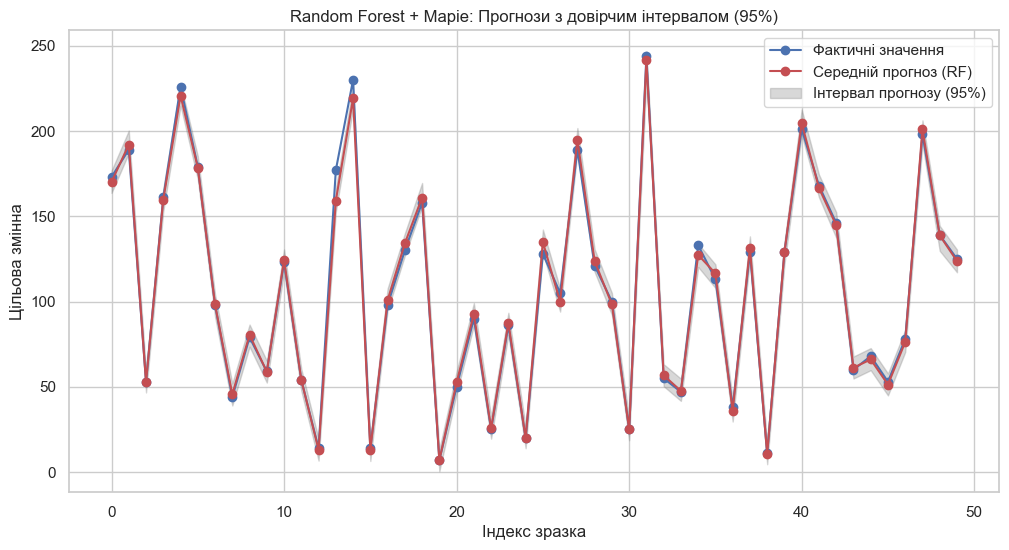

–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª: 2905
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å: 3000


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from mapie.regression import MapieRegressor

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

# –ö—Ä–æ–∫ 2: MAPIE –∑ –æ–ø—Ç–∏–º—ñ–∑–æ–≤–∞–Ω–∏–º RandomForest
mapie = MapieRegressor(estimator=best_rf, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

results_rf_optimized = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_rf_optimized.head(5))
print("Random Forest - MAE: {:.3f}, RMSE: {:.3f}, R¬≤: {:.3f}".format(mae_rf, rmse_rf, r2_rf))

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='–§–∞–∫—Ç–∏—á–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.plot(indices, y_pred[:50], 'ro-', label='–°–µ—Ä–µ–¥–Ω—ñ–π –ø—Ä–æ–≥–Ω–æ–∑ (RF)')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='–Ü–Ω—Ç–µ—Ä–≤–∞–ª –ø—Ä–æ–≥–Ω–æ–∑—É (95%)')
plt.xlabel('–Ü–Ω–¥–µ–∫—Å –∑—Ä–∞–∑–∫–∞')
plt.ylabel('–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞')
plt.title('Random Forest + Mapie: –ü—Ä–æ–≥–Ω–æ–∑–∏ –∑ –¥–æ–≤—ñ—Ä—á–∏–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º (95%)')
plt.legend()
plt.grid(True)
plt.show()

results_rf_optimized["Inside Interval"] = (
    (results_rf_optimized["Actual"] >= results_rf_optimized["Lower Bound (95%)"]) &
    (results_rf_optimized["Actual"] <= results_rf_optimized["Upper Bound (95%)"])
)

print("–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª:", results_rf_optimized["Inside Interval"].sum())
print("–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å:", len(results_rf_optimized))



#### <center> <p style = 'background-color:darkblue'><b>XGBoost + Mapie</p> </center>

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  173.214996         169.383369         177.756897
1   189.0  190.385330         185.763245         195.349869
2    53.0   53.279297          49.081734          56.297974
3   161.0  159.281219         157.748627         165.101639
4   226.0  223.783615         220.469704         227.799255
XGBoost - MAE: 1.162, RMSE: 1.611, R¬≤: 0.999


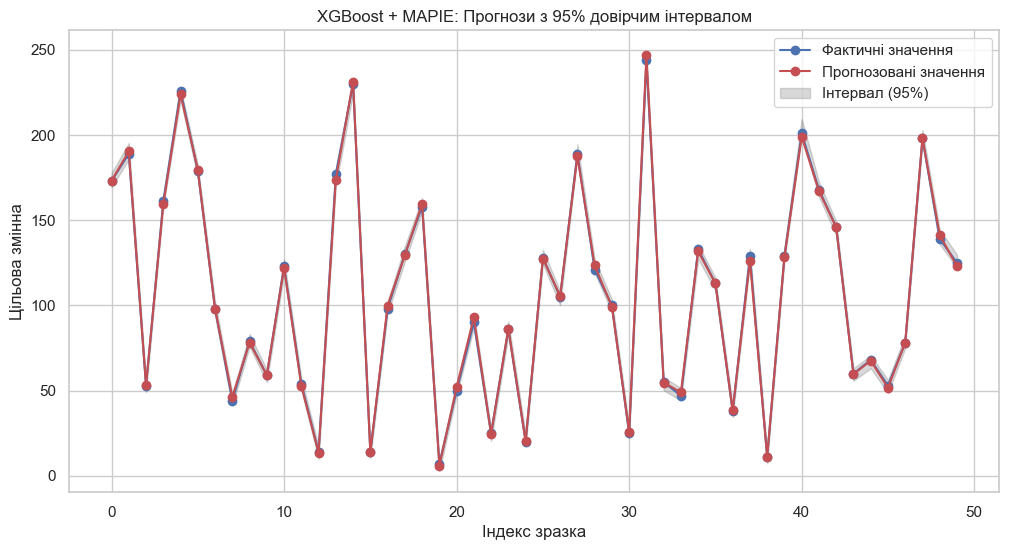

–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª: 2966
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å: 3000


In [25]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_

# MAPIE
mapie = MapieRegressor(estimator=best_xgb, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# –ú–µ–∂—ñ —ñ–Ω—Ç–µ—Ä–≤–∞–ª—É
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# –ú–µ—Ç—Ä–∏–∫–∏
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

# –¢–∞–±–ª–∏—Ü—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
results_df_gxb = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df_gxb.head(5))
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R¬≤: {:.3f}".format(mae, rmse, r2))

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='–§–∞–∫—Ç–∏—á–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.plot(indices, y_pred[:50], 'ro-', label='–ü—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='–Ü–Ω—Ç–µ—Ä–≤–∞–ª (95%)')
plt.xlabel('–Ü–Ω–¥–µ–∫—Å –∑—Ä–∞–∑–∫–∞')
plt.ylabel('–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞')
plt.title('XGBoost + MAPIE: –ü—Ä–æ–≥–Ω–æ–∑–∏ –∑ 95% –¥–æ–≤—ñ—Ä—á–∏–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.legend()
plt.grid(True)
plt.show()

results_df_gxb["Inside Interval"] = (
    (results_df_gxb["Actual"] >= results_df_gxb["Lower Bound (95%)"]) &
    (results_df_gxb["Actual"] <= results_df_gxb["Upper Bound (95%)"])
)

print("–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª:", results_df_gxb["Inside Interval"].sum())
print("–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å:", len(results_df_gxb))

#### <center> <p style = 'background-color:darkblue'><b>Stacking</p> </center>

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# –ü—ñ–¥–±—ñ—Ä –¥–ª—è RandomForestRegressor (–∑–∞–º—ñ—Å—Ç—å Ridge)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_

# –ü—ñ–¥–±—ñ—Ä –¥–ª—è DecisionTreeRegressor
tree_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 6]
}
tree_search = GridSearchCV(DecisionTreeRegressor(), tree_param_grid, cv=5)
tree_search.fit(X_train_scaled, y_train)
best_tree = tree_search.best_estimator_

# –ü—ñ–¥–±—ñ—Ä –¥–ª—è GradientBoostingRegressor (–∑–∞–º—ñ—Å—Ç—å KNN)
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
gb_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5)
gb_search.fit(X_train_scaled, y_train)
best_gb = gb_search.best_estimator_

# –ü—ñ–¥–±—ñ—Ä –¥–ª—è XGBRegressor (–º–µ—Ç–∞–º–æ–¥–µ–ª—å)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
xgb_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_

# –ü–æ–±—É–¥–æ–≤–∞ —Å—Ç–µ–∫—É –∑ –Ω–æ–≤–∏–º–∏ –±–∞–∑–æ–≤–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏
base_models = [
    ('rf', best_rf),
    ('tree', best_tree),
    ('gb', best_gb)
]

stack_optimized = StackingRegressor(
    estimators=base_models,
    final_estimator=best_xgb,
    cv=5
)

# –ù–∞–≤—á–∞–Ω–Ω—è —Å—Ç–µ–∫—É
stack_optimized.fit(X_train_scaled, y_train)
y_pred = stack_optimized.predict(X_test_scaled)

# –ú–µ—Ç—Ä–∏–∫–∏
mae_opt = mean_absolute_error(y_test, y_pred)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred))
r2_opt = r2_score(y_test, y_pred)

# –û–±–≥–æ—Ä—Ç–∫–∞ —Å—Ç–µ–∫—É –≤ Mapie –¥–ª—è –ø–æ–±—É–¥–æ–≤–∏ –¥–æ–≤—ñ—Ä—á–∏—Ö —ñ–Ω—Ç–µ—Ä–≤–∞–ª—ñ–≤
mapie = MapieRegressor(estimator=stack_optimized, method="plus")
mapie.fit(X_train_scaled, y_train)

# –ü—Ä–æ–≥–Ω–æ–∑ –∑ –¥–æ–≤—ñ—Ä—á–∏–º–∏ –º–µ–∂–∞–º–∏ (95%)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# –ú–µ–∂—ñ —ñ–Ω—Ç–µ—Ä–≤–∞–ª—É
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# –¢–∞–±–ª–∏—Ü—è –∑ —ñ–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏
results_mapie_stack = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})

print(results_mapie_stack.head(5))
# –ß–∏ –ø–æ—Ç—Ä–∞–ø–ª—è—î —Ñ–∞–∫—Ç–∏—á–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª
results_mapie_stack["Inside Interval"] = (
    (results_mapie_stack["Actual"] >= results_mapie_stack["Lower Bound (95%)"]) &
    (results_mapie_stack["Actual"] <= results_mapie_stack["Upper Bound (95%)"])
)
print("–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª:", results_mapie_stack["Inside Interval"].sum())
print("–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å:", len(results_mapie_stack))
coverage = (results_mapie_stack["Inside Interval"].sum() / len(results_mapie_stack)) * 100
print(f"–í—ñ–¥—Å–æ—Ç–æ–∫ –ø–æ–∫—Ä–∏—Ç—Ç—è —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º: {coverage:.2f}%")

# –ú–µ—Ç—Ä–∏–∫–∏
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R¬≤: {:.3f}".format(mae_opt, rmse_opt, r2_opt))


# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='–§–∞–∫—Ç–∏—á–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.plot(indices, y_pred[:50], 'ro-', label='–ü—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='–Ü–Ω—Ç–µ—Ä–≤–∞–ª (95%)')
plt.xlabel('–Ü–Ω–¥–µ–∫—Å –∑—Ä–∞–∑–∫–∞')
plt.ylabel('–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞')
plt.title('Stacking: –ü—Ä–æ–≥–Ω–æ–∑–∏ –∑ 95% –¥–æ–≤—ñ—Ä—á–∏–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.legend()
plt.grid(True)
plt.show()

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  173.265961         165.185696         177.222076
1   189.0  196.375336         187.270973         199.860306
2    53.0   51.760918          46.957596          58.076763
3   161.0  163.793320         155.396072         167.268356
4   226.0  223.688644         218.580215         230.074097
–°–∫—ñ–ª—å–∫–∏ –∑–Ω–∞—á–µ–Ω—å –ø–æ—Ç—Ä–∞–ø–∏–ª–æ –≤ —ñ–Ω—Ç–µ—Ä–≤–∞–ª: 2943
–ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å: 3000
–í—ñ–¥—Å–æ—Ç–æ–∫ –ø–æ–∫—Ä–∏—Ç—Ç—è —ñ–Ω—Ç–µ—Ä–≤–∞–ª–æ–º: 98.10%
XGBoost - MAE: 1.736, RMSE: 2.524, R¬≤: 0.998


## <Center> **–ü–µ—Ä–µ—Ö—ñ–¥ –≤—ñ–¥ —Ä–µ–≥—Ä–µ—Å—ñ—ó –¥–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó** </Center>

#### <center> <p style = 'background-color:darkblue'><b>–î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—è - pd.cut()</p> </center>

In [27]:
n_bins = 5
ds["Calories_class"] = pd.cut(ds["Calories"], bins=n_bins, labels=False)
ds["Calories_class"].value_counts()

Calories_class
0    6310
1    4306
2    3218
3    1100
4      66
Name: count, dtype: int64

<center><p><b>–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü—ñ—è, –†–æ–∑–ø–æ–¥—ñ–ª —Ç–∞ –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è —Å–∏–Ω—Ç–µ—Ç–∏—á–Ω–∏–º–∏ –¥–∞–Ω–∏–º–∏</p>

In [28]:
# –†–æ–∑–±–∏–≤–∞—î–º–æ X —Ç–∞ y
X = ds.drop(columns=['Calories', 'Calories_class'])
y = ds['Calories_class']

# Train-test split
X_train_clasify_cut, X_test_clasify_cut, y_train_clasify_cut, y_test_clasify_cut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_cut = scaler.fit_transform(X_train_clasify_cut)
X_test_clasify_scaled_cut = scaler.transform(X_test_clasify_cut)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clasify_scaled_cut, y_train_clasify_cut)

<center><p><b>–ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —Ä–æ–∑–ø–æ–¥—ñ–ª—É –∫–ª–∞—Å—ñ–≤ –ø—ñ—Å–ª—è —Å–∏–Ω—Ç–µ–∑–∞—Ü—ñ—ó –¥–∞–Ω–∏—Ö</p>

–†–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤ –ø—ñ—Å–ª—è SMOTE: {np.int64(0): np.int64(4733), np.int64(1): np.int64(4733), np.int64(2): np.int64(4733), np.int64(3): np.int64(4733), np.int64(4): np.int64(4733)}


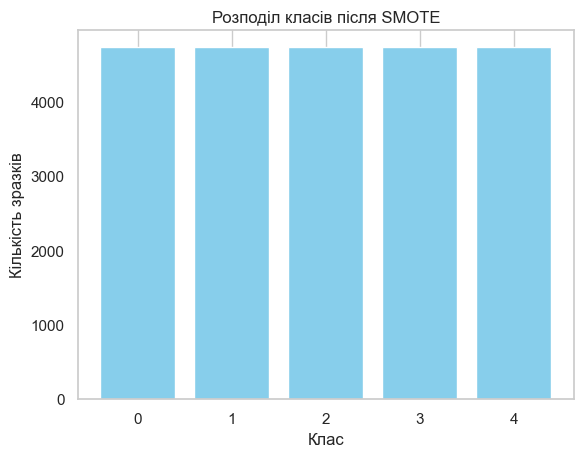

In [29]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("–†–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤ –ø—ñ—Å–ª—è SMOTE:", class_distribution)

import matplotlib.pyplot as plt

plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤ –ø—ñ—Å–ª—è SMOTE")
plt.xlabel("–ö–ª–∞—Å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑—Ä–∞–∑–∫—ñ–≤")
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y')
plt.show()

In [30]:
pd.Series(y_train_resampled).value_counts().sort_index()

Calories_class
0    4733
1    4733
2    4733
3    4733
4    4733
Name: count, dtype: int64

In [31]:
import pandas as pd

# –î–ª—è —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ—ó –≤–∏–±—ñ—Ä–∫–∏
print("Train class distribution:")
print(pd.Series(y_train_clasify_cut).value_counts().sort_index().sum())

# –î–ª—è —Ç–µ—Å—Ç–æ–≤–æ—ó –≤–∏–±—ñ—Ä–∫–∏
print("\nTest class distribution:")
print(pd.Series(y_test_clasify_cut).value_counts().sort_index().sum())


Train class distribution:
11250

Test class distribution:
3750


<center><p><b>–ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è –∑–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è XGBoost</p>

In [32]:
xgb_clf_cut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_cut.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1577
           1       0.97      0.98      0.97      1076
           2       0.97      0.97      0.97       805
           3       0.93      0.96      0.94       275
           4       0.87      0.76      0.81        17

    accuracy                           0.98      3750
   macro avg       0.95      0.93      0.94      3750
weighted avg       0.98      0.98      0.98      3750

Confusion Matrix:
[[1555   22    0    0    0]
 [  11 1052   13    0    0]
 [   0   10  779   16    0]
 [   0    0   10  263    2]
 [   0    0    0    4   13]]


<center><p><b>–ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è –∑–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è DecisionTreeClassifier</p>

In [33]:
param_grid_cut = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_cut = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_cut,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search_cut.fit(X_train_resampled, y_train_resampled)
best_tree_cut = grid_search_cut.best_estimator_
y_pred_tree_cut = best_tree_cut.predict(X_test_clasify_scaled_cut)

print("\nüìã Classification Report (Decision Tree, cut, –ø—ñ—Å–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó):")
print(classification_report(y_test_clasify_cut, y_pred_tree_cut))

print("üìä Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_tree_cut))


üìã Classification Report (Decision Tree, cut, –ø—ñ—Å–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1577
           1       0.84      0.90      0.87      1076
           2       0.83      0.78      0.80       805
           3       0.66      0.64      0.65       275
           4       0.24      0.76      0.37        17

    accuracy                           0.87      3750
   macro avg       0.71      0.80      0.73      3750
weighted avg       0.88      0.87      0.87      3750

üìä Confusion Matrix:
[[1485   92    0    0    0]
 [  37  970   69    0    0]
 [   0   89  625   88    3]
 [   0    0   61  176   38]
 [   0    0    0    4   13]]


#### <center> <p style = 'background-color:darkblue'><b>–î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—è - pd.qcut()</p> </center>

In [34]:
bins = 5

ds["Calories_class"] = pd.qcut(ds["Calories"], q=bins, labels=False)

ds["Calories_class"].value_counts()

Calories_class
0    3120
3    3026
2    2962
4    2956
1    2936
Name: count, dtype: int64

<center><p><b>–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü—ñ—è —Ç–∞ –†–æ–∑–ø–æ–¥—ñ–ª</p>

In [35]:
# –†–æ–∑–±–∏–≤–∞—î–º–æ X —Ç–∞ y
X = ds.drop(columns=['Calories', 'Calories_class'])
y = ds['Calories_class']

# Train-test split
X_train_clasify_qcut, X_test_clasify_qcut, y_train_clasify_qcut, y_test_clasify_qcut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_qcut = scaler.fit_transform(X_train_clasify_qcut)
X_test_clasify_scaled_qcut = scaler.transform(X_test_clasify_qcut)

<center><p><b>–ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è –∑–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è XGBoost</p>

In [36]:
xgb_clf_qcut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_qcut.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
y_pred_xgb_qcut = xgb_clf_qcut.predict(X_test_clasify_scaled_qcut)

print("XGBoost ‚Äî Classification Report:")
print(classification_report(y_test_clasify_qcut, y_pred_xgb_qcut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_xgb_qcut))

XGBoost ‚Äî Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       780
           1       0.96      0.97      0.96       734
           2       0.96      0.95      0.96       741
           3       0.95      0.95      0.95       756
           4       0.97      0.97      0.97       739

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750

Confusion Matrix:
[[767  13   0   0   0]
 [ 12 710  12   0   0]
 [  0  19 707  15   0]
 [  0   0  15 721  20]
 [  0   0   0  20 719]]


<center><p><b>–ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è –∑–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è DecisionTreeClassifier</p>

In [37]:
# –ì—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó
param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
best_tree = grid_search.best_estimator_
y_pred_tree_qcut = best_tree.predict(X_test_clasify_scaled_qcut)

print("\nüìã Decision Tree ‚Äî Classification Report (–ø—ñ—Å–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó):")
print(classification_report(y_test_clasify_qcut, y_pred_tree_qcut))

print("üìä Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_tree_qcut))


üìã Decision Tree ‚Äî Classification Report (–ø—ñ—Å–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       780
           1       0.79      0.89      0.84       734
           2       0.78      0.79      0.78       741
           3       0.75      0.81      0.78       756
           4       0.94      0.81      0.87       739

    accuracy                           0.84      3750
   macro avg       0.85      0.84      0.84      3750
weighted avg       0.85      0.84      0.84      3750

üìä Confusion Matrix:
[[704  76   0   0   0]
 [ 18 656  60   0   0]
 [  0  94 583  64   0]
 [  0   0 105 610  41]
 [  0   0   0 137 602]]


## <Center> **–î–æ—Å–ª—ñ–¥–∂–µ–Ω–Ω—è —Ä–æ–∑–ø–æ–¥—ñ–ª—É –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç–µ–π —É –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó** </Center>

<center><p><b>–ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç–µ–π –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–ª–∞—Å—É</p>

In [38]:
probs_tree = best_tree_cut.predict_proba(X_test_clasify_scaled_cut)
logits_xgb = xgb_clf_cut.predict_proba(X_test_clasify_scaled_cut)

In [39]:
# –û–±—á–∏—Å–ª—é—î–º–æ –º–∞–∫—Å–∏–º—É–º —ñ–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –ø–æ –∫–ª–∞—Å–∞—Ö
max_probs_tree = np.max(probs_tree, axis=1)
max_probs_xgb = np.max(logits_xgb, axis=1)

max_probs_tree[:5], max_probs_xgb[:5]

(array([0.99970318, 0.86387864, 0.75510204, 0.99970318, 0.52941176]),
 array([0.99999547, 0.9991235 , 0.9996283 , 0.9999999 , 0.99835736],
       dtype=float32))

In [40]:
# –î–ª—è DecisionTreeClassifier
probs_tree_df = pd.DataFrame(probs_tree, columns=[f"Class {i}" for i in range(probs_tree.shape[1])])
probs_tree_df["Predicted Class"] = np.argmax(probs_tree, axis=1)
print("–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:")
display(probs_tree_df.head())


–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:


Class 0   Class 1   Class 2   Class 3  Class 4  Predicted Class
0  0.999703  0.000297  0.000000  0.000000      0.0                0
1  0.000000  0.040180  0.863879  0.095941      0.0                2
2  0.244898  0.755102  0.000000  0.000000      0.0                1
3  0.999703  0.000297  0.000000  0.000000      0.0                0
4  0.000000  0.529412  0.470588  0.000000      0.0                1

In [41]:
# –î–ª—è XGBoost
probs_xgb_df = pd.DataFrame(logits_xgb, columns=[f"Class {i}" for i in range(logits_xgb.shape[1])])
probs_xgb_df["Predicted Class"] = np.argmax(logits_xgb, axis=1)
print("–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è XGBoost:")
display(probs_xgb_df.head())

–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è XGBoost:


Class 0       Class 1       Class 2       Class 3       Class 4  \
0  0.999995  4.205334e-06  1.088406e-07  1.312077e-07  1.329591e-07   
1  0.000002  1.196236e-05  9.991235e-01  8.567364e-04  5.506768e-06   
2  0.000213  9.996283e-01  2.229755e-05  9.004787e-05  4.667983e-05   
3  1.000000  1.360167e-07  2.439878e-09  2.052280e-09  2.321143e-08   
4  0.000011  1.609172e-03  9.983574e-01  6.202747e-06  1.643549e-05   

   Predicted Class  
0                0  
1                2  
2                1  
3                0  
4                2

<center><p><b>–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç–µ–π, —â–æ–± –ø–æ–±–∞—á–∏—Ç–∏ –≤–ø–µ–≤–Ω–µ–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ</p>

In [42]:
# –û—Ç—Ä–∏–º—É—î–º–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∑—Ä–∞–∑–∫–∞
max_probs_tree = np.max(probs_tree, axis=1)

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤–ø–µ–≤–Ω–µ–Ω–æ—Å—Ç—ñ: Decision Tree")
plt.xlabel("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑—Ä–∞–∑–∫—ñ–≤")
plt.grid(True)
plt.show()

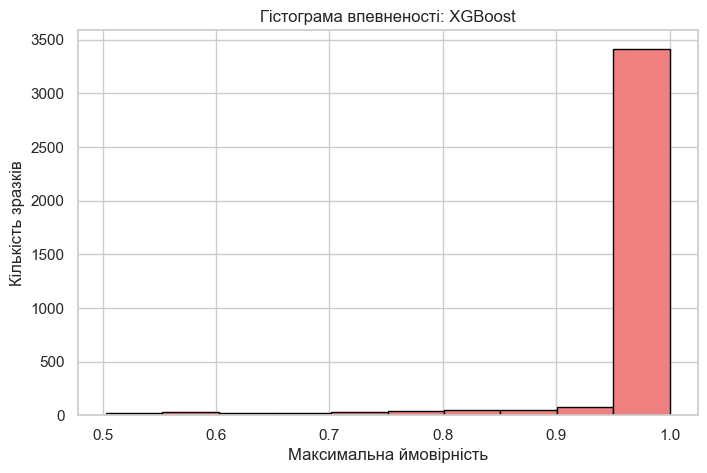

In [43]:
# –û—Ç—Ä–∏–º—É—î–º–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∑—Ä–∞–∑–∫–∞
max_probs_xgb = np.max(logits_xgb, axis=1)

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞
plt.figure(figsize=(8, 5))
plt.hist(max_probs_xgb, bins=10, color='lightcoral', edgecolor='black')
plt.title("–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤–ø–µ–≤–Ω–µ–Ω–æ—Å—Ç—ñ: XGBoost")
plt.xlabel("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑—Ä–∞–∑–∫—ñ–≤")
plt.grid(True)
plt.show()


<center><p><b>–Ø–∫ –∑–º—ñ–Ω—é—î—Ç—å—Å—è —Ä–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–∏ overfitting —Ç–∞ underfitting</p>

#### <center> <p style = 'background-color:darkblue'><b>–ü–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–∞ –º–æ–¥–µ–ª—å</p> </center>

In [44]:
# –Ø–≤–Ω–æ –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–∞ –º–æ–¥–µ–ª—å
overfitted_tree = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# –ù–∞–≤—á–∞–Ω–Ω—è
overfitted_tree.fit(X_train_resampled, y_train_resampled)

# –ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred_overfitted = overfitted_tree.predict(X_test_clasify_scaled_cut)

# –ú–µ—Ç—Ä–∏–∫–∏
print("\nüìã Classification Report (Overfitted Decision Tree):")
print(classification_report(y_test_clasify_cut, y_pred_overfitted))

print("üìä Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_overfitted))


üìã Classification Report (Overfitted Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1577
           1       0.93      0.95      0.94      1076
           2       0.94      0.90      0.92       805
           3       0.85      0.91      0.88       275
           4       0.68      0.76      0.72        17

    accuracy                           0.95      3750
   macro avg       0.88      0.90      0.89      3750
weighted avg       0.95      0.95      0.95      3750

üìä Confusion Matrix:
[[1543   34    0    0    0]
 [  29 1024   23    0    0]
 [   0   41  724   40    0]
 [   0    0   20  249    6]
 [   0    0    0    4   13]]


In [45]:
probs_tree_overfitted = overfitted_tree.predict_proba(X_test_clasify_scaled_cut)
# –û–±—á–∏—Å–ª—é—î–º–æ –º–∞–∫—Å–∏–º—É–º —ñ–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –ø–æ –∫–ª–∞—Å–∞—Ö
max_probs_tree_overfitted = np.max(probs_tree_overfitted, axis=1)

max_probs_tree_overfitted[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [46]:
# –î–ª—è Decision Tree overfitted
probs_tree_df_overfitted = pd.DataFrame(probs_tree_overfitted, columns=[f"Class {i}" for i in range(probs_tree_overfitted.shape[1])])
probs_tree_df_overfitted["Predicted Class"] = np.argmax(probs_tree_overfitted, axis=1)
print("–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:")
display(probs_tree_df_overfitted.head())

–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:


Class 0  Class 1  Class 2  Class 3  Class 4  Predicted Class
0      1.0      0.0      0.0      0.0      0.0                0
1      0.0      0.0      1.0      0.0      0.0                2
2      0.0      1.0      0.0      0.0      0.0                1
3      1.0      0.0      0.0      0.0      0.0                0
4      0.0      0.0      1.0      0.0      0.0                2

In [47]:
# –û—Ç—Ä–∏–º—É—î–º–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∑—Ä–∞–∑–∫–∞ overfitted
max_probs_tree = np.max(probs_tree_overfitted, axis=1)

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤–ø–µ–≤–Ω–µ–Ω–æ—Å—Ç—ñ: Decision Tree")
plt.xlabel("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑—Ä–∞–∑–∫—ñ–≤")
plt.grid(True)
plt.show()

#### <center> <p style = 'background-color:darkblue'><b>–ù–µ–¥–æ–Ω–∞–≤—á–µ–Ω–∞ –º–æ–¥–µ–ª—å</p> </center>

In [48]:
# –ù–µ–¥–æ–Ω–∞–≤—á–µ–Ω–∞ –º–æ–¥–µ–ª—å
underfitted_tree = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# –ù–∞–≤—á–∞–Ω–Ω—è
underfitted_tree.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)

# –ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred_underfitted = underfitted_tree.predict(X_test_clasify_scaled_qcut)

# –ú–µ—Ç—Ä–∏–∫–∏
print("\nüìã Decision Tree ‚Äî Classification Report (Underfitted –º–æ–¥–µ–ª—å):")
print(classification_report(y_test_clasify_qcut, y_pred_underfitted))

print("üìä Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_underfitted))


üìã Decision Tree ‚Äî Classification Report (Underfitted –º–æ–¥–µ–ª—å):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       780
           1       0.74      0.81      0.77       734
           2       0.46      0.87      0.60       741
           3       0.00      0.00      0.00       756
           4       0.79      0.91      0.85       739

    accuracy                           0.69      3750
   macro avg       0.59      0.69      0.62      3750
weighted avg       0.59      0.69      0.62      3750

üìä Confusion Matrix:
[[663 117   0   0   0]
 [ 34 595 105   0   0]
 [  0  93 646   0   2]
 [  0   0 584   0 172]
 [  0   0  69   0 670]]


In [49]:
probs_tree_underfitted = underfitted_tree.predict_proba(X_test_clasify_scaled_cut)
# –û–±—á–∏—Å–ª—é—î–º–æ –º–∞–∫—Å–∏–º—É–º —ñ–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –ø–æ –∫–ª–∞—Å–∞—Ö
max_probs_underfitted = np.max(probs_tree_underfitted, axis=1)

max_probs_underfitted[:20] 

array([0.76101988, 0.80134281, 0.46237808, 0.95948522, 0.46237808,
       0.80134281, 0.95948522, 0.76101988, 0.76101988, 0.95948522,
       0.95948522, 0.95948522, 0.46237808, 0.46237808, 0.76101988,
       0.46237808, 0.46237808, 0.46237808, 0.46237808, 0.46237808])

In [50]:
# –î–ª—è Decision Tree underfitted
probs_tree_df_underfitted = pd.DataFrame(probs_tree_underfitted, columns=[f"Class {i}" for i in range(probs_tree_underfitted.shape[1])])
probs_tree_df_underfitted["Predicted Class"] = np.argmax(probs_tree_underfitted, axis=1)
print("–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:")
display(probs_tree_df_underfitted.head())

–ô–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è Decision Tree:


Class 0   Class 1   Class 2   Class 3   Class 4  Predicted Class
0  0.140882  0.761020  0.098099  0.000000  0.000000                1
1  0.000000  0.000000  0.001185  0.197472  0.801343                4
2  0.000232  0.082675  0.462378  0.411054  0.043660                2
3  0.959485  0.040515  0.000000  0.000000  0.000000                0
4  0.000232  0.082675  0.462378  0.411054  0.043660                2

In [51]:
# –û—Ç—Ä–∏–º—É—î–º–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∑—Ä–∞–∑–∫–∞ underfitted
max_probs_tree = np.max(probs_tree_underfitted, axis=1)

# –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –≤–ø–µ–≤–Ω–µ–Ω–æ—Å—Ç—ñ: Decision Tree")
plt.xlabel("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑—Ä–∞–∑–∫—ñ–≤")
plt.grid(True)
plt.show()

## <Center> **–û–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞** </Center>

In [52]:
xgb_clf_cut = XGBClassifier(
    n_estimators=500,        # –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–µ—Ä–µ–≤
    max_depth=5,             # –≥–ª–∏–±–∏–Ω–∞ –∫–æ–∂–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞
    learning_rate=0.1,       # —à–≤–∏–¥–∫—ñ—Å—Ç—å –Ω–∞–≤—á–∞–Ω–Ω—è
    subsample=0.8,           # —á–∞—Å—Ç–∏–Ω–∞ –¥–∞–Ω–∏—Ö –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞ (–¥–æ–ø–æ–º–∞–≥–∞—î —É–Ω–∏–∫–Ω—É—Ç–∏ overfitting)
    colsample_bytree=0.8,    # —á–∞—Å—Ç–∫–∞ –æ–∑–Ω–∞–∫ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞
    gamma=1,                 # –º—ñ–Ω—ñ–º–∞–ª—å–Ω–∞ –≤—Ç—Ä–∞—Ç–∞ –¥–ª—è —Ä–æ–∑–≥–∞–ª—É–∂–µ–Ω–Ω—è
    reg_alpha=0.1,           # L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—è
    reg_lambda=1,            # L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—è
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# –ù–∞–≤—á–∞–Ω–Ω—è
xgb_clf_cut.fit(X_train_clasify_scaled_cut, y_train_clasify_cut)

# –ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

# –ú–µ—Ç—Ä–∏–∫–∏
print("üìã XGBoost ‚Äî Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))

print("üìä Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

üìã XGBoost ‚Äî Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1577
           1       0.96      0.97      0.97      1076
           2       0.96      0.96      0.96       805
           3       0.93      0.95      0.94       275
           4       1.00      0.65      0.79        17

    accuracy                           0.97      3750
   macro avg       0.97      0.90      0.93      3750
weighted avg       0.97      0.97      0.97      3750

üìä Confusion Matrix:
[[1555   22    0    0    0]
 [  15 1042   19    0    0]
 [   0   16  776   13    0]
 [   0    0   15  260    0]
 [   0    0    0    6   11]]


## <Center> **–ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –º–µ—Ç—Ä–∏–∫ –º—ñ–∂ —Ä–µ–≥—Ä–µ—Å—ñ—î—é —Ç–∞ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—î—é** </Center>

<center><p><b>MAE - Accuracy</p></center>

In [ ]:
y_test = np.array(y_test).reshape(-1, 1)
y_pred = np.array(y_pred).reshape(-1, 1)
    
# –î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—è
y_true_class = y_test_clasify_cut
y_pred_class = y_pred_xgb_cut

# –û–±—á–∏—Å–ª–∏–º–æ MAE –º—ñ–∂ –∫–ª–∞—Å–∞–º–∏
mae_class = np.mean(np.abs(y_true_class - y_pred_class))

# MAE –º—ñ–∂ –Ω–æ–º–µ—Ä–∞–º–∏ –∫–ª–∞—Å—ñ–≤
print(mae_class)
# –§–æ—Ä–º—É–ª–∞ –¥–ª—è –ø—Ä–∏–±–ª–∏–∑–Ω–æ—ó accuracy
max_error = 5 - 1
approx_accuracy = 1 - (mae_class / max_error)
print(approx_accuracy)

0.028266666666666666
0.9929333333333333


<center><p><b>Accurancy - MAE</p></center>

In [82]:

accuracy = 0.97
n_classes = 5
# –û–±—á–∏—Å–ª–µ–Ω–Ω—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ—ó –º–æ–∂–ª–∏–≤–æ—ó –ø–æ–º–∏–ª–∫–∏ –ø—Ä–∏ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó
max_possible_error = (n_classes - 1) / 2

# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è Accuracy —É MAE
approx_mae = (1 - accuracy) * max_possible_error

# –û–∫—Ä—É–≥–ª–µ–Ω–Ω—è –¥–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ
approx_mae = round(approx_mae, 3)

# –í–∏–≤—ñ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É
print(f"Accuracy: {accuracy}")
print(f"–û—Ü—ñ–Ω–µ–Ω–∞ MAE –º—ñ–∂ –∫–ª–∞—Å–∞–º–∏: {approx_mae}")


Accuracy: 0.97
–û—Ü—ñ–Ω–µ–Ω–∞ MAE –º—ñ–∂ –∫–ª–∞—Å–∞–º–∏: 0.06


In [79]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# –ö—ñ–ª—å–∫—ñ—Å—Ç—å –∫–ª–∞—Å—ñ–≤
n_bins = 4

# –ù–∞–≤—á–∞–Ω–Ω—è –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ç–æ—Ä–∞ –Ω–∞ y_test
kbin = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
kbin.fit(y_test.reshape(-1, 1))  # –ë–µ–∑ .values!

# –î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—è –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å
y_pred_binned = kbin.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# –î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü—ñ—è —ñ—Å—Ç–∏–Ω–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å
y_true_binned = kbin.transform(y_test.reshape(-1, 1)).astype(int).flatten()

# Accuracy –º—ñ–∂ –∫–ª–∞—Å–∞–º–∏
accuracy = accuracy_score(y_true_binned, y_pred_binned)
print(f"Accuracy –º—ñ–∂ —ñ—Å—Ç–∏–Ω–Ω–∏–º–∏ –∫–ª–∞—Å–∞–º–∏ —Ç–∞ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–∏–º–∏ –∑ —Ä–µ–≥—Ä–µ—Å—ñ—ó: {accuracy:.4f}")


Accuracy –º—ñ–∂ —ñ—Å—Ç–∏–Ω–Ω–∏–º–∏ –∫–ª–∞—Å–∞–º–∏ —Ç–∞ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–∏–º–∏ –∑ —Ä–µ–≥—Ä–µ—Å—ñ—ó: 0.9797


In [80]:
bin_means = {}
for cls in np.unique(y_true_binned):
    bin_means[cls] = y_test[y_true_binned == cls].mean()

print("–°–µ—Ä–µ–¥–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —Ü—ñ–ª—å–æ–≤–æ—ó –∑–º—ñ–Ω–Ω–æ—ó –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–ª–∞—Å—É:")
for k, v in bin_means.items():
    print(f"–ö–ª–∞—Å {k}: {v:.2f}")

# –ó–∞–º—ñ–Ω—é—î–º–æ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—ñ –∫–ª–∞—Å–∏ –Ω–∞ —Å–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—É
y_pred_avg = np.array([bin_means[cls] for cls in y_pred_binned])

# –û–±—á–∏—Å–ª—é—î–º–æ MAE –º—ñ–∂ —Ü–∏–º–∏ "—Å–µ—Ä–µ–¥–Ω—ñ–º–∏" –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏ —ñ —Å–ø—Ä–∞–≤–∂–Ω—ñ–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏
mae_avg = mean_absolute_error(y_test, y_pred_avg)
print(f"\nMAE —á–µ—Ä–µ–∑ —Å–µ—Ä–µ–¥–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –∫–ª–∞—Å—ñ–≤: {mae_avg:.4f}")

–°–µ—Ä–µ–¥–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —Ü—ñ–ª—å–æ–≤–æ—ó –∑–º—ñ–Ω–Ω–æ—ó –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–ª–∞—Å—É:
–ö–ª–∞—Å 0: 17.69
–ö–ª–∞—Å 1: 56.80
–ö–ª–∞—Å 2: 108.84
–ö–ª–∞—Å 3: 179.64

MAE —á–µ—Ä–µ–∑ —Å–µ—Ä–µ–¥–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –∫–ª–∞—Å—ñ–≤: 14.1808
